# SIMPLE LINEAR REGRESSION - GRIP-Data Science and Business Analytics-JAN-2022
In this Task we will use Simple Linear Regression to predict the the percentage of score obtained by the student based on the number of hours he/she has studied.


## Importing all libraries required in this notebook to perform the task

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading the CSV file of the data set

In [2]:
url_data="http://bit.ly/w-data"
data=pd.read_csv(url_data)
# Taking a look at the first few rows :
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Analysis : To find the shape and check for null values

In [39]:
#To check the dimension of the data set
(m,n)=data.shape
print("dimension of student_score dataset : (m,n) =",(m,n))

dimension of student_score dataset : (m,n) = (25, 2)


In [7]:
#To check for null values in data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Description of data set
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


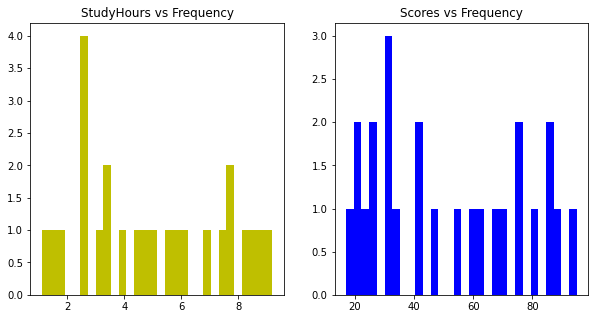

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].hist(data['Hours'],bins=30,color='y')
axs[1].hist(data['Scores'],bins=30,color='b')
axs[0].title.set_text('StudyHours vs Frequency')
axs[1].title.set_text('Scores vs Frequency')
plt.show()

## Visualization of Data 

<Figure size 360x360 with 0 Axes>

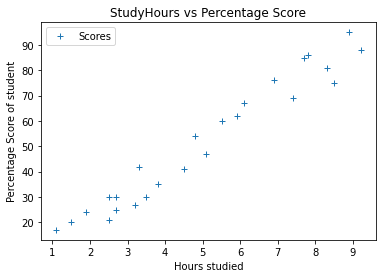

In [26]:
fig1=plt.figure(figsize=(5,5))
data.plot(x="Hours",y="Scores", style='+')
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score of student")
plt.title("StudyHours vs Percentage Score")
plt.show()

## Correlation of data :

In [43]:
a,b_value=stats.pearsonr(data.Hours,data.Scores)
print("correlation coefficient : ",a)
print("b_value : ",b_value)

correlation coefficient :  0.9761906560220885
b_value :  9.132624467459842e-17


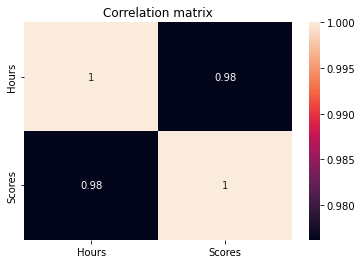

In [34]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

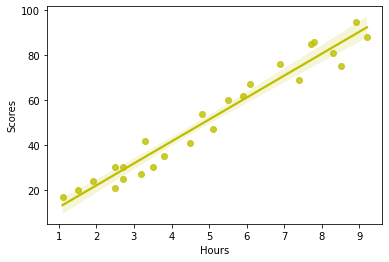

In [56]:
#To draw the realtionship between hours studied and percentage scores
sns.regplot(x="Hours",y="Scores",data=data,color='y')
plt.show()

## To train Linear Model

In [40]:
#To separate the testset and trainset 
X=data.iloc[:,0:n-1]
y=data.iloc[:,n-1]

In [41]:
#Spliting the Hours_Score Dataset (80% (trainset) and 20% (testset))
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=90)

In [42]:
#Creating the model and fit it
model=LinearRegression().fit(X_train,y_train)
print("done")

done


In [44]:
b_training=model.score(X_train,y_train)
print("coefficient of determination (Training Score):",b_training)

coefficient of determination (Training Score): 0.9515256300683571


Text(0.5, 1.0, 'StudyHours vs Score (Training Set)')

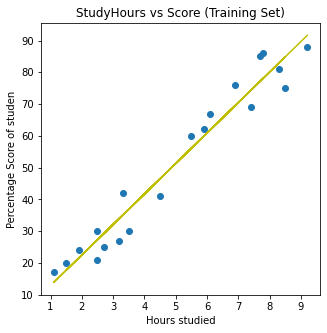

In [46]:
#Drawing the best fit Line on the training set :
y_predict=model.predict(X_train)
fig=plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict,c="y")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score of studen")
plt.title("StudyHours vs Score (Training Set)")

## Predictions to be done on the Test Set

In [47]:
y_test_pred=model.predict(X_test)

In [50]:
b_test=model.score(X_test,y_test)
print("Coefficient of determination (Test Score):",b_training)


Coefficient of determination (Test Score): 0.9515256300683571


In [51]:
#Comparing Actual and predicted
Comp=pd.DataFrame({'Actual':y_test,'predicted':y_test_pred})
Comp

,Actual,predicted
1,47,52.260012
22,35,39.779853
21,54,49.379976
20,30,29.219719
15,95,88.740476


Text(0.5, 1.0, 'StudyHours vs Score (Test set)')

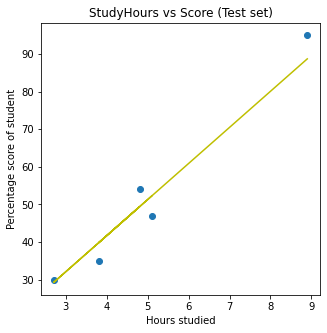

In [54]:
#Drawing the fit line on the test set
fig=plt.figure(figsize=(5,5))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,c="y")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score of student")
plt.title("StudyHours vs Score (Test set)")


## To predict the score of a student who studies for 9.25hours per day

In [58]:
per_score = model.predict([[9.25]])[0]
print(" If a student studies for 9.25 hours/day,he will probably score : {:.2f} %".format(per_score))

 If a student studies for 9.25 hours/day,he will probably score : 92.10 %
